<a href="https://colab.research.google.com/github/rodriguezhh/IA_SIDIEN/blob/main/IA_secuencial_completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CONSTRUYENDO UN MODELO SECUENCIAL


Dataset mediante DRIVE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Manipulación del Dataset


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

IMAGE_SIZE = 256
BATCH_SIZE = 64
CHANELS = 3
EPOCHS = 20

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Universidad/Tesis/Dataset/color",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 8070 files belonging to 10 classes.


Obtención de las clases y visualización

In [ ]:
class_names = dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

Se define los datos de entrenamiento, de validación y de testeo, mediante una Función.


In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

Se guardan los datos


In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
print(len(train_ds), len(val_ds), len(test_ds))

101 12 14


Resize and rescale

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

Data augmentation

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
     ]
)

Construyendo el modelo 


In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANELS)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation, 
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(8, (3,3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (64, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (64, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (64, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (64, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (64, 125, 125, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (64, 62, 62, 16)         0         
 2D)                                                  

In [ ]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

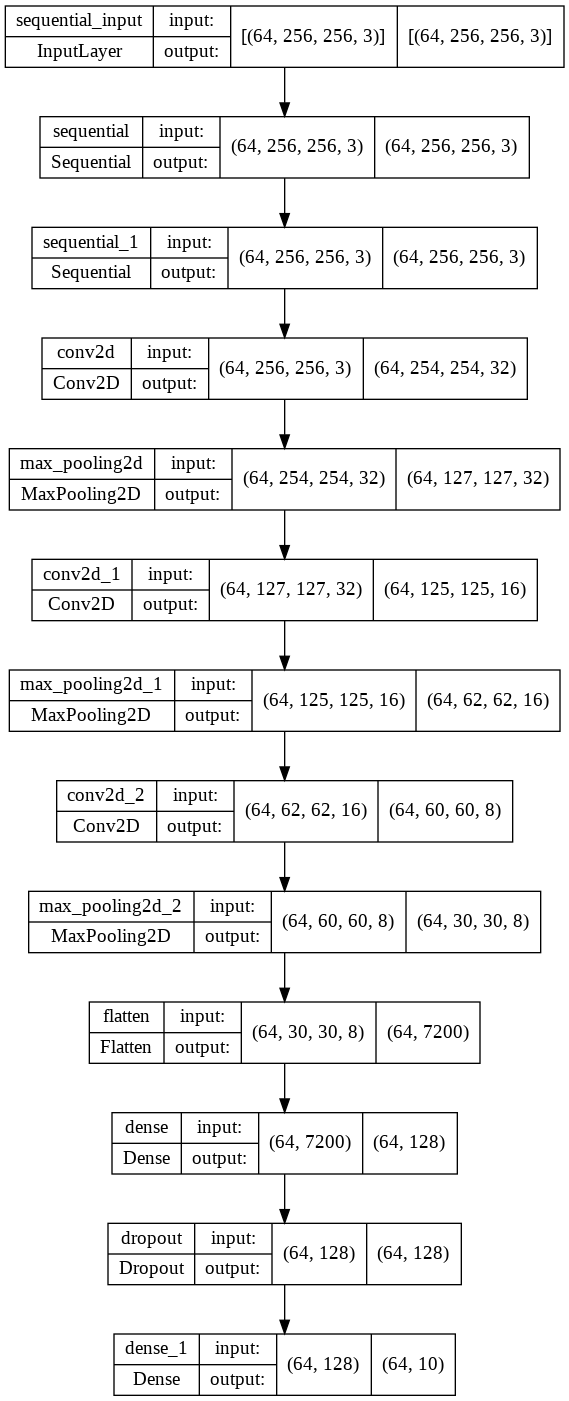

In [ ]:
keras.utils.plot_model(
 model, "Modelo secuencial.png", show_shapes=True)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    batch_size = BATCH_SIZE
)

Epoch 1/20
101/101 [==============================] - 3053s 5s/step - loss: 1.6064 - accuracy: 0.3921 - val_loss: 1.0948 - val_accuracy: 0.6172
Epoch 2/20
101/101 [==============================] - 499s 5s/step - loss: 1.1315 - accuracy: 0.5885 - val_loss: 1.0789 - val_accuracy: 0.6094
Epoch 3/20


In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('actual label', class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])